Detector Effects 
===============	

Study of Detector Effects on the angular correlation between decay ($\theta$) and escape ($\phi$) angles for the SuperNEMO experiment. $\theta$ is defined as the angle between the two emitted electrons as they are emitted in the $\beta\beta$ decay - the initial angle. $\phi$ is defined as the angle between the two electrons as they escape the source foil and enter the tracker - the final angle. The angles are obtained from the scalar products of the momentum vectors as found in the relevant G4Step in the simulation process. 


$cos(\theta) = \frac{p_1 \cdot p_2}{|p_1||p_2|}$


In order to get study only the detector effects separated from the physics of $\beta\beta$ decay, we have simulated $10^8$ events with uniform angular distribution as well as uniform single electron spectra. This is to make sure that each angle is sampled with the same probability and that the input events are uniformly distributed, thus we do not favour certain events as would be the case for standard $\beta\beta$ decay which has a preference for back-to-back electrons. 



In [1]:
using Revise
using StatsPlots, UnROOT, StatsBase, Polynomials, LinearAlgebra
using FHist, MPThemes, DataFramesMeta, Distributions

In [2]:
ENV["COLUMNS"] = 2000
ENV["LINES"] = 20

20

In [3]:
gr()
default(fmt = :png)
theme(:dao;
    size           = (800, 800),
    legend         = :topleft,
    guidefontsize  = 16,
    tickfontsize   = 12,
    titlefontsize  = 16,
    legendfontsize = 12,
    left_margin    = 4Plots.mm,
    right_margin   = 8Plots.mm,
    top_margin     = 4Plots.mm,
    bottom_margin  = 6Plots.mm,
    dpi            = 100,
    :colorbar_titlefontsize => 16,
);

In [4]:
baseDir = "/home/shoram/Work/PhD_Thesis/Job15/AngularCorrelations/"
figDir  = joinpath("/media/shoram/Extra SSD/CernBox/Work/Presentations/20221006_SuperNEMO_Analysis_Meeting/Figs")
dϕ      = 1

1

In [5]:
include("/home/shoram/Work/PhD_Thesis/SNAngularCorrelation/AngularCorrelations/MiscFuncs.jl")
using .MiscFuncs

In [6]:
f    = ROOTFile(
    baseDir*"AngularCorrelationAllEnergies96MilEvents.root",
);
tree = DataFrame(LazyTree(f, "tree", keys(f["tree"])));

Once the events have been simulated in Falaise, a number of data-cuts has been applied in order to filter only the $\beta\beta$ candidate events. A possible $\beta\beta$ candidate must have:

 1. Two negatively charged tracks reconstructed,
 2. Two vertices on the source foil, within given distance from each other,
 3. Sum of electron energies within the range: $0 ~keV \leq E_{sum} \leq 3500 ~keV$,
 4. Two individual Optical Module hits,
 5. Two associated Optical Module hits. 

 The result of applying the data-cuts is a change in $\theta$ distribution from uniform to "*increasing toward higher angles*". The comparison is shown in the following figure:

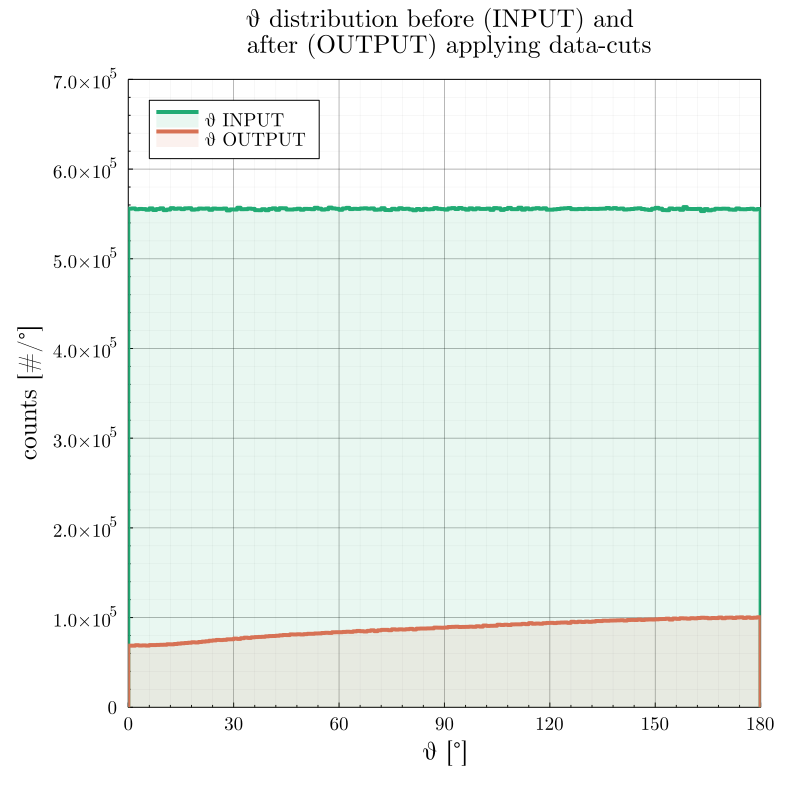

In [7]:
thetasINPUT = rand(Uniform(0,180), 100_000_000)

histogram(thetasINPUT, nbins = 180, lw = 4, c= 10,
          xlims  = (0,180), ylims  =(0,7e5), label = "θ INPUT", fillrange = 0, fillalpha = 0.1,
          xlabel = "θ [°]", ylabel = "counts [#/°]", 
          title  = "θ distribution before (INPUT) and \n after (OUTPUT) applying data-cuts"
)

histogram!(tree.thetaEmitted, nbins = 180, lw = 4, c= 1,
           label = "θ OUTPUT", fillrange = 0, fillalpha = 0.1
)

Two important features can be noticed in the figure. First, the overall number of events has been reduced from $10^8$ to $\sim 1.6 \cdot 10^7$ events. The efficiency of the applied data-cuts is around $16 \%$. Second, the spectrum shape has been changed - from uniform INPUT spectrum to spectrum in which higher angles are prefered.

 Once the path of the particles through the detector has been simulated using Falaise, $\phi$ can be extracted and studied. The comparison of $\theta$ and $\phi$ distributions is shown below. From now on, the OUTPUT spectrum of $\theta$ will be marked only by $\theta$. 

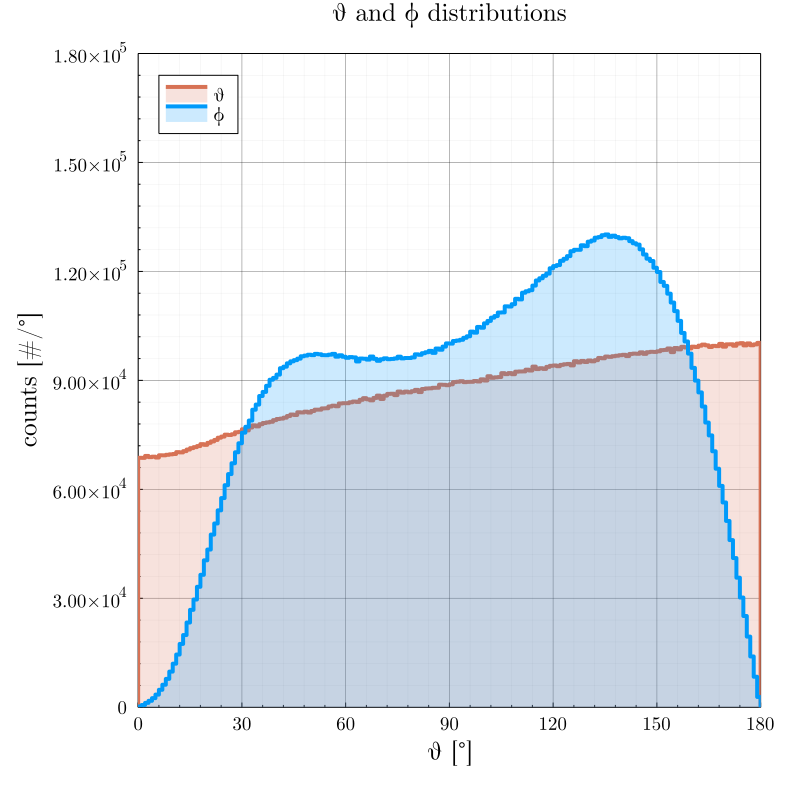

In [8]:
histogram(tree.thetaEmitted, nbins = 180, lw = 4, c= 1,
          xlims  = (0,180), ylims  =(0,1.8e5), label = "θ", fillrange = 0, fillalpha = 0.2,
          xlabel = "θ [°]", ylabel = "counts [#/°]", 
          title  = "θ and ϕ distributions"
)

histogram!(tree.thetaEscaped, lw = 4, c= 2, label = "ϕ", fillrange = 0, fillalpha = 0.2,)

 The shape of the $\phi$ distribution is vastly different from $\theta$. Five features (comparison between $\theta$ and $\phi$) are noted and will be looked into more in detail:

 1. Dip in $\phi$ spectrum at low angles, roughly $0^{\circ} \leq \phi \leq 30^{\circ} $, we will call this **region 1**;
 2. Rise in $\phi$ spectrum at angles roughly $30^{\circ} \leq \phi \leq 70^{\circ} $, we will call this **region 2**;
 3. Dip in $\phi$ spectrum at angles roughly $70^{\circ} \leq \phi \leq 110^{\circ} $, we will call this **region 3**;
 4. Rise in $\phi$ spectrum at angles roughly $110^{\circ} \leq \phi \leq 150^{\circ} $, we will call this **region 4**;
 5. Dip in $\phi$ spectrum at angles roughly $150^{\circ} \leq \phi \leq 180^{\circ} $, we will call this **region 5**. 

The regions are marked in the following figure using separate color shadings. 

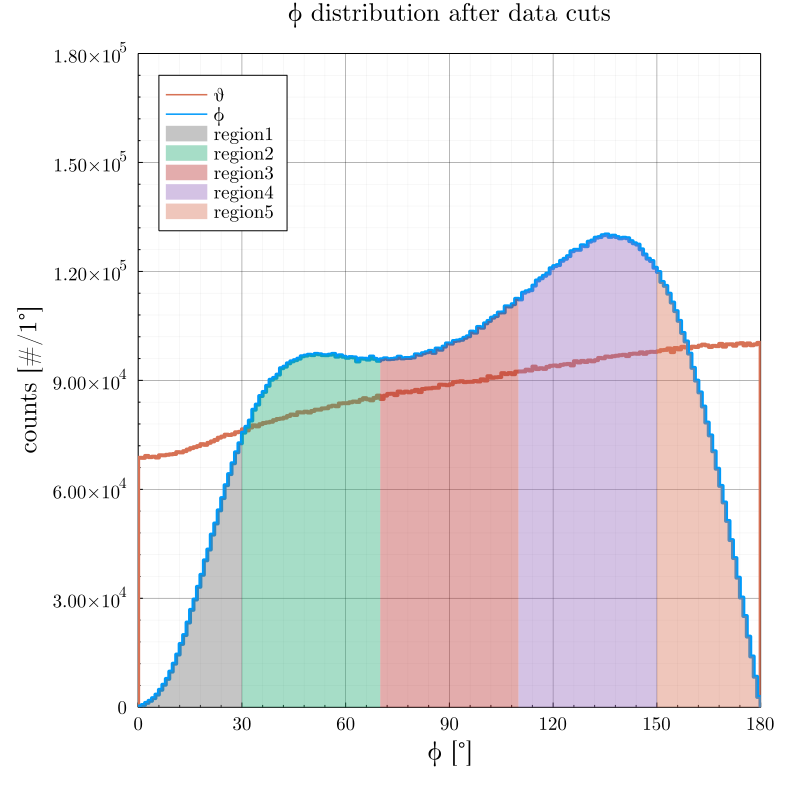

In [9]:
stephist(tree.thetaEmitted, 
        nbins = 180, 
        label ="θ", 
        xlabel = "ϕ [°]", 
        ylabel = "counts [#/1°]", 
        lw    = 4,
        xlims = (0,180),
        ylims = (0, 1.8e5),
)
stephist!(tree.thetaEscaped, nbins = 180, lw = 4, c= 2, label = "ϕ",)

sdf1 = @chain tree begin
    @subset( 0 .<= :thetaEscaped .<= 30)
end

stephist!(
sdf1.thetaEscaped, 
nbins  = 30, 
xlabel = "ϕ [°]", 
ylabel = "counts [#/1°]", 
title  = "ϕ distribution after data cuts \n Individual regions are color-marked",
lw     = 0,
alpha  = 0.4,
label  = "region1",
fillrange = 0,
)

sdf2 = @chain tree begin
    @subset( 30 .<= :thetaEscaped .<= 70)
end

stephist!(
sdf2.thetaEscaped, 
nbins  = 40, 
xlabel = "ϕ [°]", 
ylabel = "counts [#/1°]", 
title  = "ϕ distribution after data cuts",
lw     = 0,
alpha  = 0.4,
label  = "region2",
fillrange = 0,
)

sdf3 = @chain tree begin
    @subset( 70 .<= :thetaEscaped .<= 110)
end

stephist!(
sdf3.thetaEscaped, 
nbins  = 40, 
xlabel = "ϕ [°]", 
ylabel = "counts [#/1°]",  
title  = "ϕ distribution after data cuts",
lw     = 0,
alpha  = 0.4,
label  = "region3",
fillrange = 0,
)

sdf4 = @chain tree begin
    @subset( 110 .<= :thetaEscaped .<= 150)
end

stephist!(
sdf4.thetaEscaped, 
nbins  = 40, 
xlabel = "ϕ [°]", 
ylabel = "counts [#/1°]", 
title  = "ϕ distribution after data cuts",
lw     = 0,
alpha  = 0.4,
label  = "region4",
fillrange = 0,
)

sdf5 = @chain tree begin
    @subset( 150 .<= :thetaEscaped .<= 180)
end

stephist!(
sdf5.thetaEscaped, 
nbins  = 30, 
xlabel = "ϕ [°]", 
ylabel = "counts [#/1°]", 
title  = "ϕ distribution after data cuts",
lw     = 0,
alpha  = 0.4,
label  = "region5",
fillrange = 0,
)

 First of, it must be emphasized that the underlying principle between the change in shape from $\theta$ to $\phi$ overall is due to the fact that an event with $\theta$ as the initial decay angle between the electrons can (after the electrons traverse the source foil) change into **any physical** $\phi$. The probability of this change is not uniform, however. 

 For example, a single $\beta\beta$ decay event has $\theta = 10.5^{\circ}$. The electrons travel through the foil, scattering multiple times, and escape with $\phi = 110.5^{\circ}$. In such a case, in the $\theta$ distribution with bin-width $\Delta \phi = 1^{\circ}$, such an event would fall within the bin with edges $b_i \in (10, 11)^{\circ}$, whereas in the $\phi$ distribution it would be shifted to bin with edges $b_j \in (110, 111)^{\circ}$. 

 Of course, the initial $\theta = 10.5^{\circ}$ could have changed into any other physical angle (in range $(0,180)^{\circ}$), however with various probabilities. Quantitatively this effect will be studied later. Here we only focus on the qualitative effects of the detector. 

 With this in mind, there is another important factor to keep in mind. When $\theta$ is very small (the angle is *closed*) there is more *room* for the shift to be toward higher angles. When angle is *closed* it can only *open*. The opposite is true for the situation with large $\theta$ events. 

Qualitative analysis of $\phi$ distribution **by Region**
=========

It is noted, from the studies made in (DocDB #4816) that the track reconstruction is most successfull with electrons that escape the source foil perpendicular to the y-z plane of the source foil. On the other hand, the vertex reconstruction is decreased with events being parallel to the foil. 


## Region 1 and Region 5

The two *dips* in regions 1 (very small $\phi$) and 5 (very large $\phi$) can be explained with similar reasoning. First of all, the previosly mentioned *openning* (*closing*) of *closed* (*open*) angles results in events with $\theta$ within said regions being more likely to be shifted toward the other regions, thus these regions are more likely to be *drained* of their statistics.
Secondly, we can look at these regions in terms of how well events generated within them pass through the aforementioned data-cuts: 

 1. <font color="red">An event must have two negatively charged tracks reconstructed</font>, 
 2. <font color="red">Two vertices on the source foil, within given distance from each other</font>,
 3. <font color="green">Sum of electron energies within the range: $0~keV \leq E_{sum} \leq 3500~keV$</font>,
 4. <font color="red">Two individual Optical Module hits</font>,
 5. <font color="red">Two associated Optical Module hits</font>. 

Since $\phi$ is very small/large, both electrons will follow roughly the same path along a single line. Thus if one of the electrons escapes in the path **along** the source foil (which is difficult for track reconstruction due to the tracker cell design), *both* will travel along the foil. The first and second data-cut are not fulfilled. Furthermore, for events from region 1, it is possible that both electrons hit the same OM, thus fourth and fifth data-cuts are not fulfilled. Lastly, electrons with very small $\theta$ will fly along a very similar trajectory, which may be evaluated as a single particle in the reconstruction, rather than two separate electrons. The more apart the trajectories are from each other, the easier it is to reconstruct them as two individual particles. 

Adding these *difficulties* in the fulfilment of of data-cut condition, along with the shift between regions, results in the dips in the $\phi$ distribution shape. 

## Region 2 and Region 4

The $\phi$ distribution shows two rising peaks in the region 2 and region 4. These are regions with events of moderately opened/closed angles. In terms of the *shifting* of angles from regions 1 and 5, here most events will be shifted into, as it is the next closest (see quantitative analysis). Furthermore, from the geometry of the detector design, when one of the electrons escapes the foil perpendicular, the other electron will be within moderate angle off of it, however it will not be parallel to the foil, yet. These two regions are composed of electrons with *easiest* to reconstruct trajectories. 

Lastly, there is an apparent discrepancy between the height of the *peak* of region 2 and region 4 (with region 4 being the *taller* one). This discrepancy is likely due to the fact that - as noted in DocDB #4816 - with the smaller angles it is still probable that the reconstruction will not be successfull in separating the two individual tracks. 

 1. <font color="green">An event must have two negatively charged tracks reconstructed</font>, 
 2. <font color="green">Two vertices on the source foil, within given distance from each other</font>,
 3. <font color="green">Sum of electron energies within the range: $0~keV \leq E_{sum} \leq 3500~keV$</font>,
 4. <font color="green">Two individual Optical Module hits</font>,
 5. <font color="green">Two associated Optical Module hits</font>. 

## Region 3 

The *dip* in the region 3 is explained in DocDB #4816. The events with $\phi$ close to $90^{\circ}$ suffer from the detectors preference for events perpendicular to the source foil. When an electron escapes the source foil perpendicular to it, the other electron will escape parallel. Such events are then difficult for vertex reconstruction. 

 1. <font color="red">An event must have two negatively charged tracks reconstructed</font>, 
 2. <font color="red">Two vertices on the source foil, within given distance from each other</font>,
 3. <font color="green">Sum of electron energies within the range: $0~keV \leq E_{sum} \leq 3500~keV$</font>,
 4. <font color="green">Two individual Optical Module hits</font>,
 5. <font color="green">Two associated Optical Module hits</font>. 
 


Further investigation into region 2 and 4 discrepancy
=======

From analysis in DocDB #4816, it is easier to reconstruct events when the electrons escape on opposite sides of the foil, rather than same side. 

In [10]:
gdf = @chain tree begin
    @transform :side = ifelse.( :momentumEscaped1x .* :momentumEscaped2x .> 0, 1, 0)
    groupby(:side)
end;

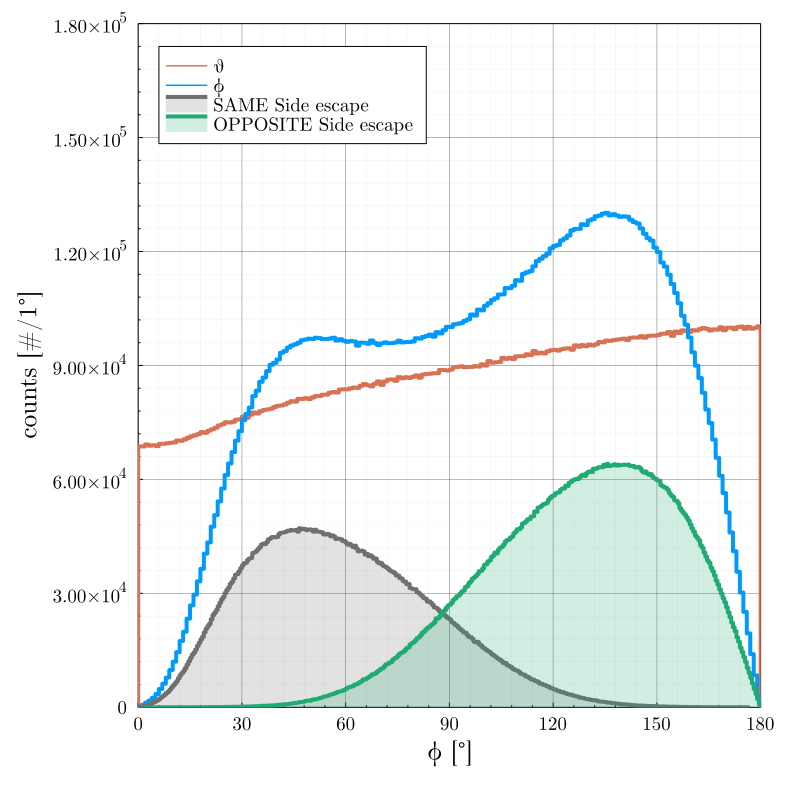

In [11]:
stephist(tree.thetaEmitted, 
        nbins = 180, 
        label ="θ", 
        lw    = 4,
        xlims = (0,180),
        ylims = (0, 1.8e5),
        xlabel = "ϕ [°]", 
        ylabel = "counts [#/1°]", 
)
stephist!(tree.thetaEscaped, nbins = 180, lw = 4, c= 2, label = "ϕ",)
stephist!(gdf[(side = 1,)].thetaEscaped, lw = 4, c = 3, label = "SAME Side escape", fillrange = 0, fillalpha = 0.2)
stephist!(gdf[(side = 0,)].thetaEscaped, lw = 4, c = 4, label = "OPPOSITE Side escape", fillrange = 0, fillalpha = 0.2)

It can be seen that the vast majority of events in the region 4 originate from opposite side escape electrons, thus the better efficiency of reconstruction is apparent in the taller peak. 

Quantitative analysis - *the g(k) method*
===


Following the qualitative analysis presented above, a more quantitative approach will now be introduced. The goal of the so-called *g(k) method* is to quantitatively describe correlation between $\theta$ and $\phi$. This method is used for evaluation of proposed data-cuts. 

To derive the method, two figures are presented:
1. $f(\theta, \phi)$ - a 2D histogram with $\theta$ distribution on the x-axis and $\phi$ distribution on the y-axis
2. $g(k)$ - a 1D histogram with *so-called* $k$-line on the x-axis, where bin heights correspond to the integral over individual $k_i$ lines. $k$-lines are defined as diagonal lines in $f(\theta, \phi)$, fulfilling condition $k_i=\phi - \theta; (\phi - \theta) \in b_i$; binned as necessary, in general binning of $\Delta\phi = \Delta\theta = 1^{\circ}$ is used. 

## $f(\theta, \phi)$

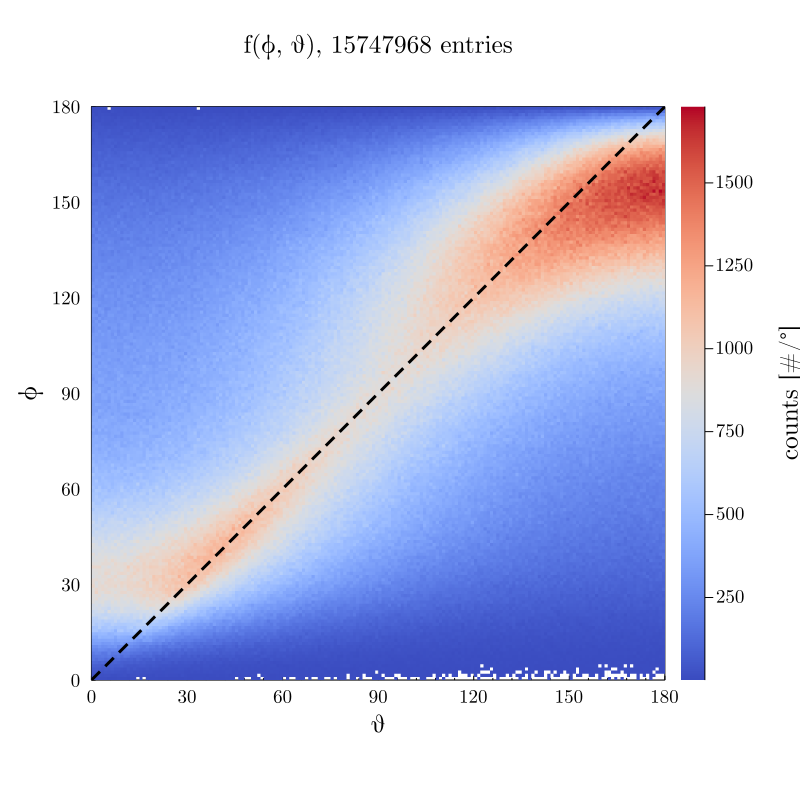

In [20]:
nBins = 180

h2d1 = histogram2d(
    tree.thetaEmitted,
    tree.thetaEscaped;
    nbins          = (nBins, nBins),
    xlabel         = "θ",
    ylabel         = "ϕ",
    legend         = :topright,
    title          = string("\nf(ϕ, θ), ", nrow(tree), " entries"),
    lims           = (0, 180),
    aspect_ratio   = 1,
    c              = :coolwarm,
    colorbar_title = "\ncounts [#/°]",

)

plot!(y, c = :black, lw= 3, ls =:dash, label = "", legend = :topleft)

The correlation of $\theta$ and $\phi$ in $f(\theta, \phi)$ shows an S-shaped structure. There are two *hotspots* visible in the 2D histogram. First, a *smaller* hotspot is visible in the lower left quadrant of $f(\theta, \phi)$, here in-general $\phi > \theta$ - escape angles are overestimated over decay angles. The second *larger* hotspot is visible in the upper right quadrant of $f(\theta, \phi)$ where $\phi < \theta$ - escape angles are underestimed over decay angles. 



## k-lines

In the figure above of $f(\theta, \phi)$, a reference k = 0 line is shown by black dashed line. This line represents the bins where $\phi = \theta$, perfect correlation. In the figure below, two more k-lines are depicted. $k = -20$ and $k = +20$ lines are show in red and blue, respectively. These lines in turn represent $\phi - \theta = -20$ and $\phi - \theta = 20$. 

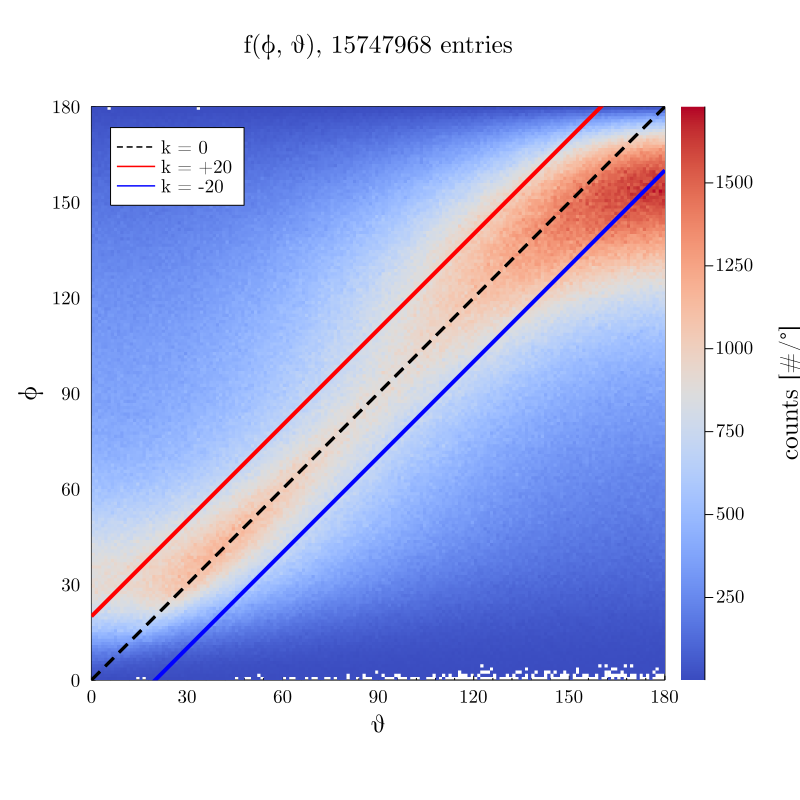

In [21]:
pts = 0:0.1:180

plot!(y, c = :black, lw= 3, ls =:dash, label = "k = 0", legend = :topleft)
plot!(pts, pts .+ 20,  lw= 4, c  =:red , label = "k = +20")
plot!(pts, pts .- 20,  lw= 4, c  =:blue, label = "k = -20")

## $g(k)$

As stated earlier, the $g(k)$ is a 1D histgoram of the integrals over the k-lines. The total number of k-lines to integrate $f(\theta, \phi)$ over is equal to $(180/\Delta\phi) * 2 + 1$, dependent on the binwidth $\Delta\phi$. To avoid double binning, $g(k)$ is not calculated from $f(\theta, \phi)$ itself, but rather from the definition of $k$-lines. Thus for each event, $\phi - \theta$ is calculated and **then** binned in the 1D histogram $g(k)$. The figure below shows $g(k)$ of the original $f(\theta, \phi)$ presented above. In the text following, some data-cuts will be introduced which produce different $f_i(\theta, \phi)$ distributions and corresponding $g_i(k)$ histograms.  

#### To quantitatively describe the correlation using $g(k)$-method, we calculate the RMS of the distribution as the standard error and the area representing the total amount of events that pass the cuts. 

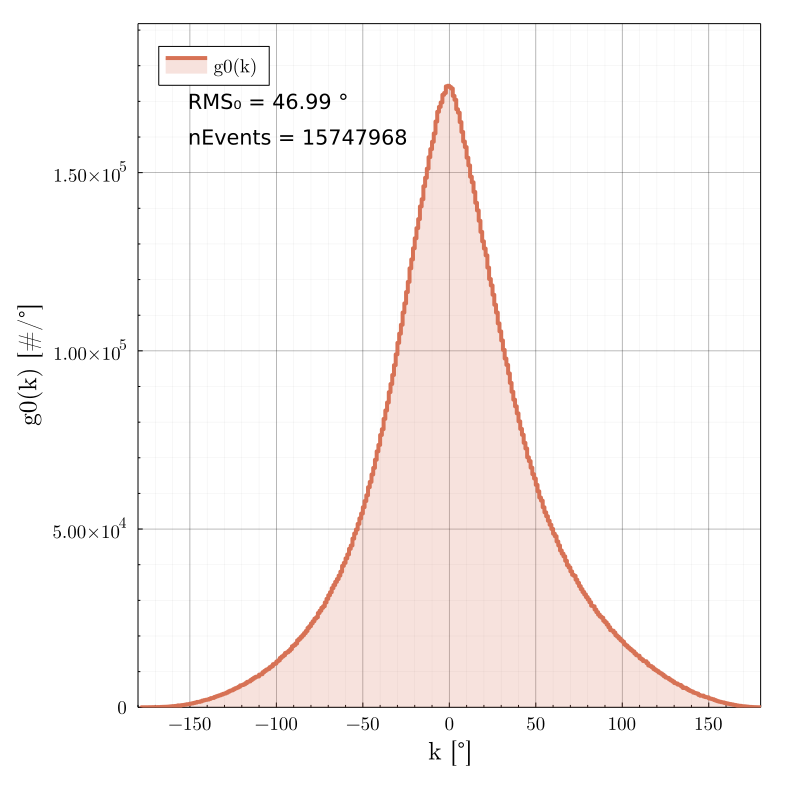

In [14]:
difs0 = tree.thetaEscaped .- tree.thetaEmitted    # array of ϕ - θ
rms0  = round(get_rms(difs0), digits = 2)
h0    = StatsBase.fit(Histogram, difs0, -180:180)
nEvents = nrow(tree)

histogram(difs0, 
    xlims  = (-180,180), 
    ylims  = (0, 1.1*maximum(h0.weights)), 
    nbins  = length(h0.edges[1]),
    xlabel = "k [°]",
    ylabel = "g0(k) [#/°]",
    label  = "g0(k)",
    lw     = 4,
    fillrange = 0,
    fillalpha = 0.2
)

annotate!((-150, 1.7e5, text("RMS₀ = $rms0 °", 14, :left)))
annotate!((-150, 1.6e5, text("nEvents = $nEvents ", 14, :left)))

The figure above depicts the $g(k)$ histogram calculated from $f(\theta, \phi)$. The $g(k)$ distribution is centered around $k = 0$ line, which represents perfect correlation. However, the distribution is quite wide as the $RMS = 46.99^{\circ}$. All events from the original distribution are represented. 

$g(k)$ - analysis of energy cuts
===

The goal of calculating $g(k)$ and its $RMS$ is to evaluate different data-cuts. In the analysis below, various energy cuts are tested. Six data-cuts are presented - the sum of electron energies $E_{sum}$ must fulfill $E_{sum} \in (500*i, 500*i + \DeltaE); \DeltaE = 500 keV; i = (1, 2, 3, 4, 5, 6) keV$. (Events with $E_{sum} \in (0, 500) keV$ are omitted as there is not enough statistics). 

First, a set of $f\_i(\theta, \phi)$ is presented.  

In [15]:
@transform! tree :ESum = :reconstructedEnergy2 + :reconstructedEnergy1;

In [16]:
hs = []
for e in 500:500:3000
    e2 = e+500
    gdf = @chain tree begin
        @subset((e .<= :ESum .<= e2))
        @select(:thetaEscaped, :thetaEmitted, :ESum)
    end

    push!(hs, histogram2d(gdf.thetaEmitted, gdf.thetaEscaped, 
                 nbins = nBins, lims=(0, 180), xlabel="θ [°]", ylabel="ϕ [°]",
                 c = :coolwarm, title ="Esum ∈ ($e, $e2) keV"
        )
    )
end

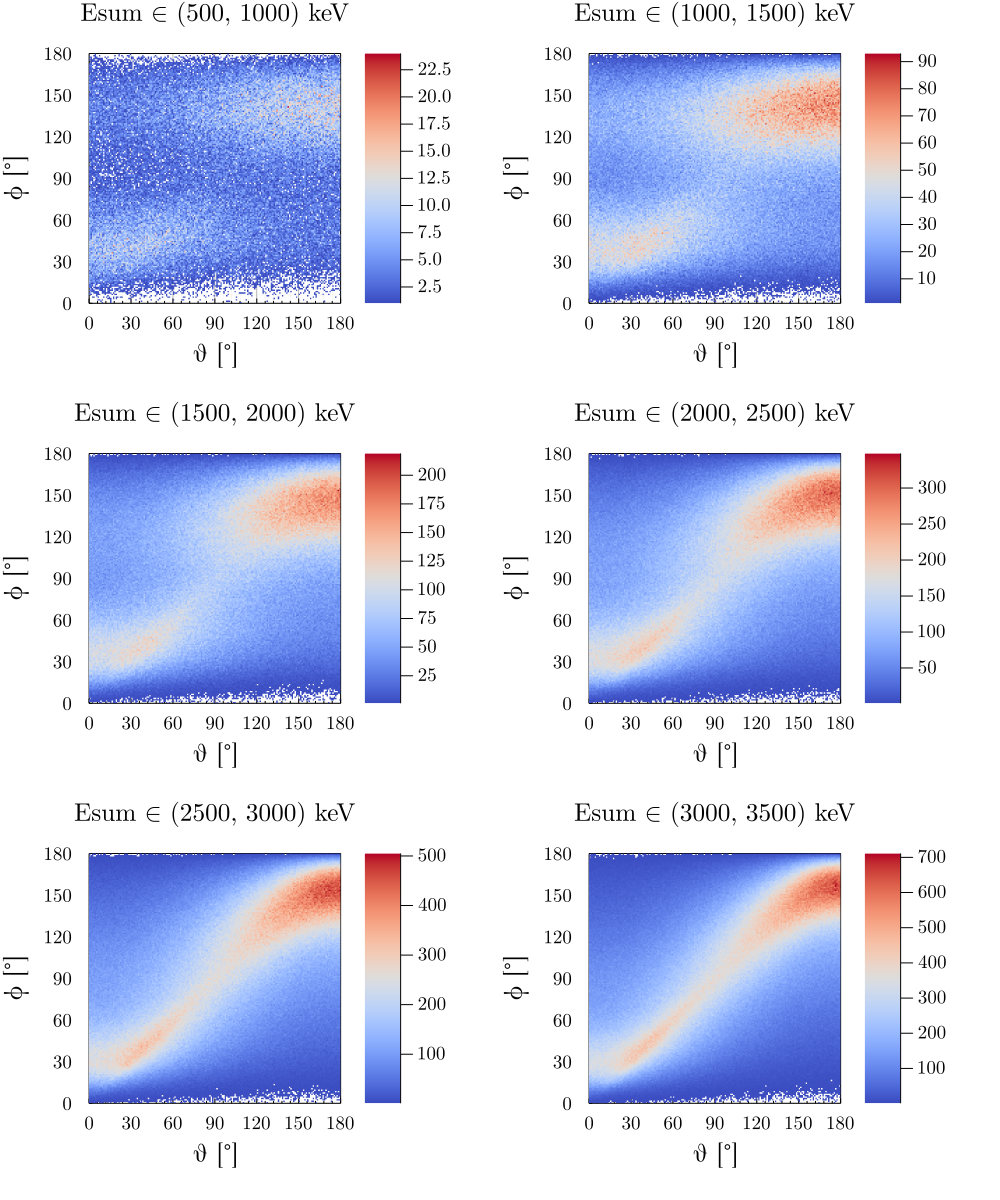

In [17]:
plot(hs[1], hs[2], hs[3], hs[4], hs[5], hs[6], size = (1000, 1200), layout = @layout [a b; c d; e f ])

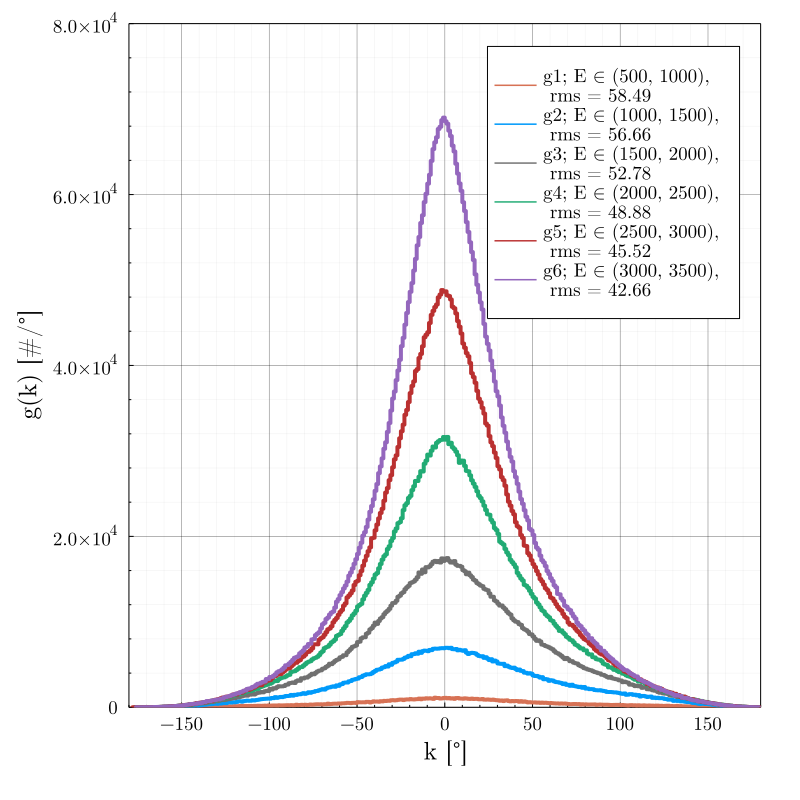

In [18]:
p = plot(size = (800, 800), legend=:topright, xlims=(-180, 180), xlabel="k [°]", ylabel="g(k) [#/°]", lw = 4)
for (i,e) in enumerate(500:500:3000)
    e2 = e+500
    gdf = @chain tree begin
        @subset((e .<= :ESum .<= e2))
        @select(:thetaEscaped, :thetaEmitted, :ESum)
    end

    difs   = gdf.thetaEscaped .- gdf.thetaEmitted
    rms    = round(get_rms(difs), digits = 2)
    h1     = StatsBase.fit(Histogram, difs, -180:180)
    
    stephist!(p, difs, 
        nbins  = Int(180/dϕ*2+1), 
        lw     = 4, 
        label  ="g$i; E ∈ ($e, $e2), \n rms = $rms",
        legend =:topright, 
        xlims  = (-180,180), 
        xlabel = "k [°]",
        ylims  = (0, 8e4)
    )

end
p

It is visible from both figures $f_i(\theta, \phi)$ that the number of events increases with increasing energy. 

The $RMS$ is represented in the legend. Again, with increasing energy data-cut $RMS$ decreases. To view the width of each distribution, the histograms are normalized to area of 1.

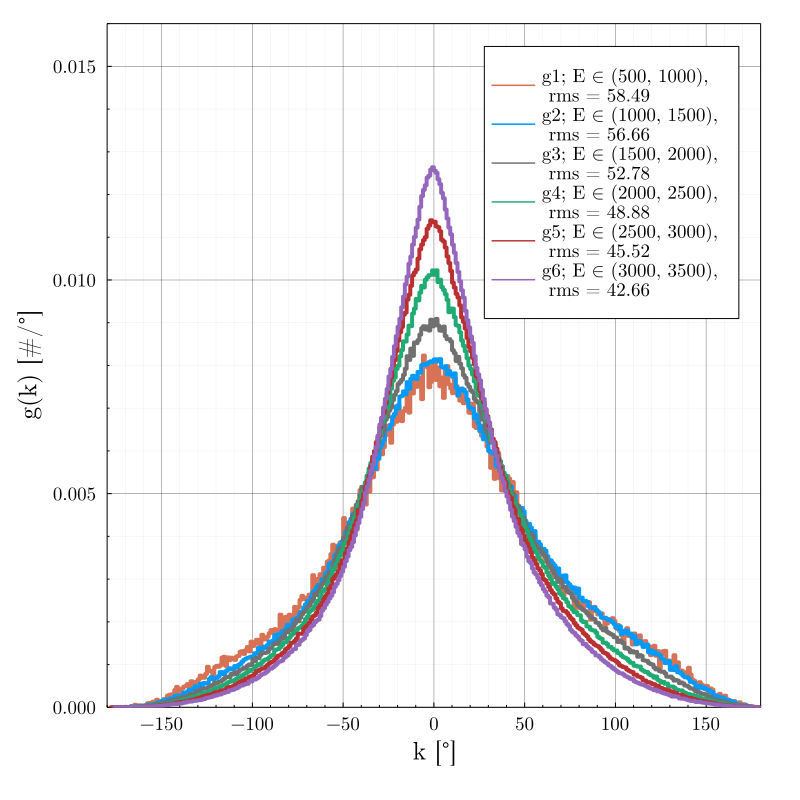

In [19]:
p = plot(size = (800, 800), legend=:topright, xlims=(-180, 180), xlabel="k [°]", ylabel="g(k) [#/°]", lw = 4)
for (i,e) in enumerate(500:500:3000)
    e2 = e+500
    gdf = @chain tree begin
        @subset((e .<= :ESum .<= e2))
        @select(:thetaEscaped, :thetaEmitted, :ESum)
    end

    difs   = gdf.thetaEscaped .- gdf.thetaEmitted
    rms    = round(get_rms(difs), digits = 2)
    h1     = StatsBase.fit(Histogram, difs, -180:180)
    
    stephist!(p, difs, 
              nbins  = Int(180/dϕ*2+1), 
              lw     = 4, 
              label  = "g$i; E ∈ ($e, $e2), \n rms = $rms",
              legend = :topright, 
              xlims  = (-180,180), 
              xlabel = "k [°]",
              norm   = :pdf,
              ylims  = (0, 0.016)
    )

end
p

### From the figure, it is visible that increasing the energy cut improves the corellation. 